In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
import math

from audio_utils import *

In [2]:
sound_file = './record/test1.wav'
#play_wav(sound_file)

### time domain

In [4]:
from scipy.io import wavfile
from scipy.fftpack import fft

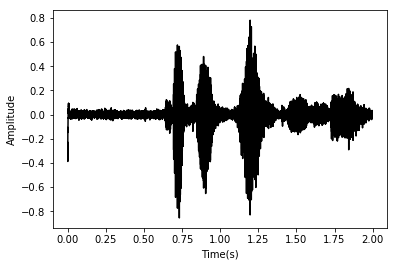

In [5]:
fs, sig = wavfile.read(sound_file)
sig_scale = sig / (2.**15)
sig_len = len(sig_scale)

time_array = np.arange(0,sig_len,1) / float(fs)

plt.figure()
plt.plot(time_array, sig_scale, color='k')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

### frequency domain

In [6]:
fft_sig = fft(sig_scale)

half_sig_len = int(math.ceil((sig_len + 1) / 2.0))
abs_fft_sig = abs(fft_sig[0:half_sig_len])

abs_fft_sig = abs_fft_sig / float(sig_len)
abs_fft_sig = abs_fft_sig **2

if sig_len % 2 > 0: # odd number of points fft
    abs_fft_sig[1:len(abs_fft_sig)] = abs_fft_sig[1:len(abs_fft_sig)] * 2
else: # even
    abs_fft_sig[1:len(abs_fft_sig) - 1] = abs_fft_sig[1:len(abs_fft_sig) - 1] * 2 
    

sig_freqs = np.arange(0, half_sig_len, 1.0) * (float(fs) / sig_len)

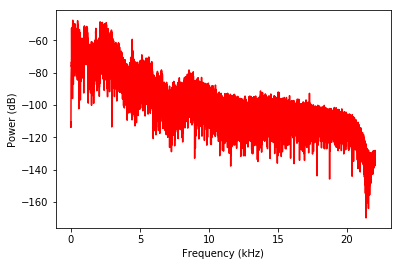

In [7]:
plt.figure()
plt.plot(sig_freqs/1000.0, 10 * np.log10(abs_fft_sig), color='r')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.show()